**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/your-first-map).**

---


# Introduction

[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, run the code cell below to set up our feedback system.

In [1]:
import geopandas as gpd

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [2]:
loans_filepath = "./data/kiva/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

phil_loans_data = world_loans[world_loans['country'] == 'Philippines']
phil_loans_data.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

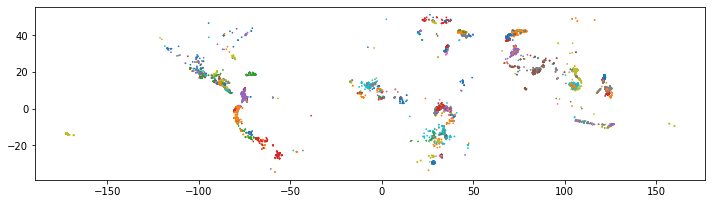

In [19]:
print(world_loans.columns)
world_loans.plot(markersize=0.5, column='Field Part', figsize=(12, 12))

In [3]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

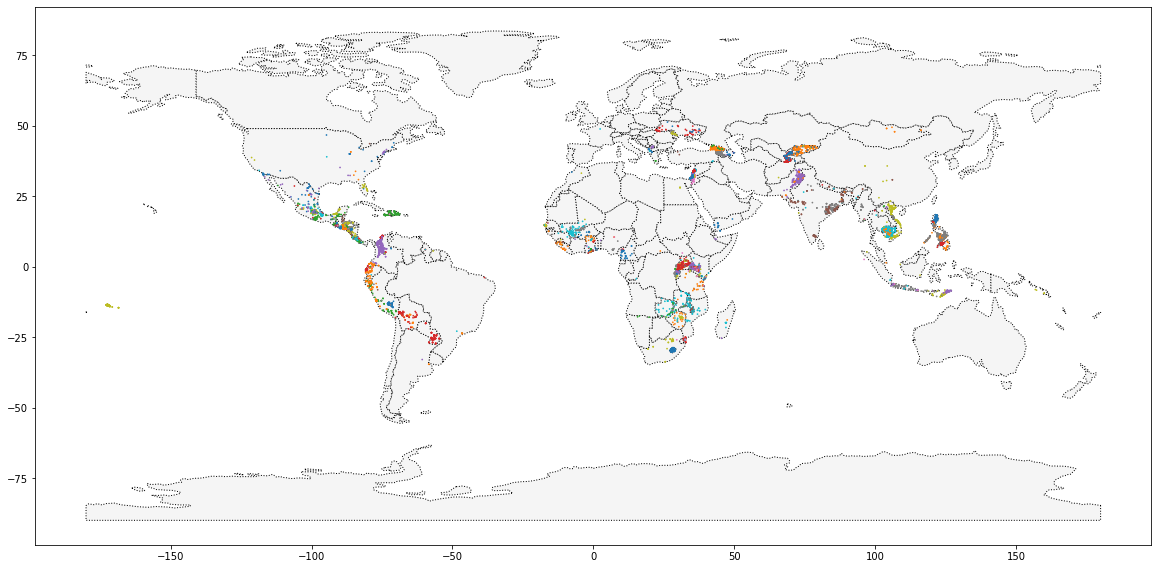

In [4]:
ax = world.plot(color='whitesmoke', figsize=(20, 20), linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=0.5, column='Field Part', figsize=(12, 12));

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [5]:
PHL_loans = world_loans[world_loans['country'] == 'Philippines']

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [9]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("data/kiva/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


In [11]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'];

'rw'

Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

In [10]:
PHL.plot(ax=ax);

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

# This is just Philippines teritory

<AxesSubplot:>

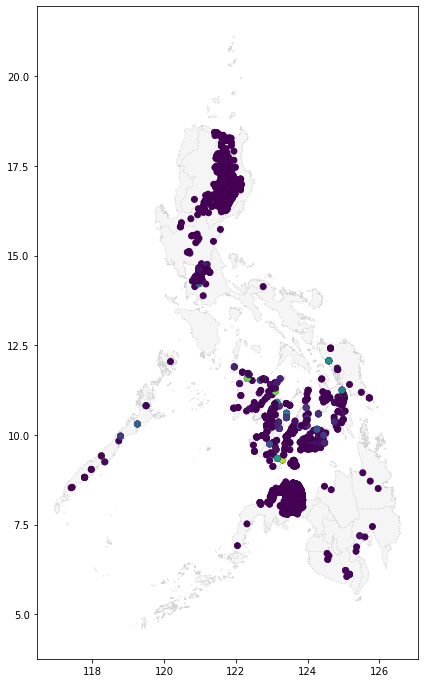

In [12]:
# this is the polygon of the teritory of philippines
ax = PHL.plot(figsize=(12, 12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, column='amount');

## Displaying a heatmap on the regions needing most investors

<AxesSubplot:>

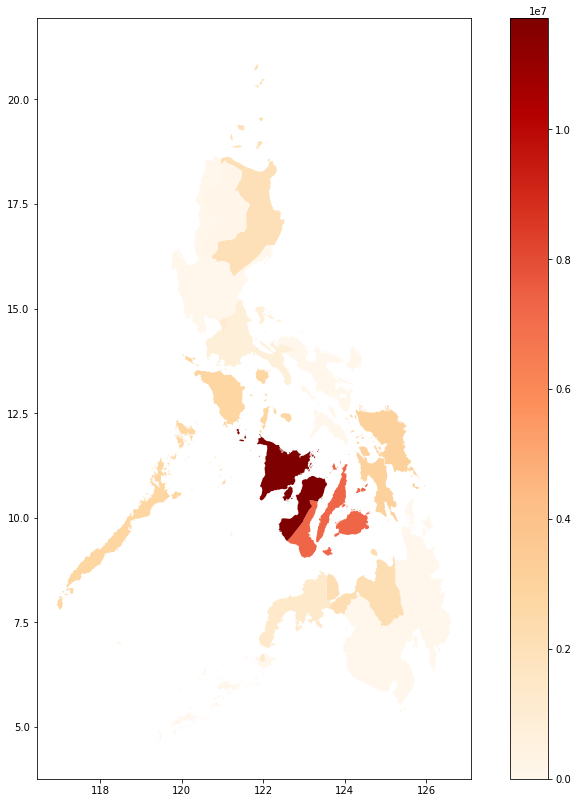

In [13]:
sum_amounts = lambda x: PHL_loans[PHL_loans.geometry.within(x)].amount.sum()
loans_sum = PHL.geometry.apply(sum_amounts)

PHL['loans_sum'] = loans_sum
PHL.plot(column='loans_sum', legend=True, figsize=(14, 14), cmap='OrRd');